In [1]:
import os
from pathlib import Path
import CSD_WDM_OOP as WDM
import pandas as pd
import numpy as np

#set path directory
cwd = os.getcwd()



In [2]:
#Case Study Application of CSD-WDM on the Salt Lake City Department of Public Utilities in Northern Utah, USA
#Load Training/Testing data
p = Path(cwd + '/Data/Processed_Training_Data')
Municipaldata = {i.stem[0:3] : pd.read_excel(i) for i in p.glob('**/*.xlsx')}
snowdata=pd.read_excel(cwd + '/Data/Alta_LCC_snow.xlsx')


'''Per UDWR 2001, Utah's Water Resources: Planning for the future, the govenor ordered a
    25% reduction in water use by 2025
'''
#Establish conservation thresholds
#Duration in years since implementation of conservation goals (depends on municipality)
Conservation_Duration = 20
Outdoor_Conservation_rate = 0.25
Indoor_Conservation_rate = 0.28

#Set up CSD-WDM module
CSDWDM = WDM.CSDWDM(cwd)

#Process training data (for case use in Salt lake City)
CSDWDM.SLC_Data_Processing(Municipaldata,snowdata, Outdoor_Conservation_rate, Indoor_Conservation_rate, Conservation_Duration)
    


In [4]:
 #Create the list of parameters to search through to optimize model performance
p_space = {
    'snowfeatures': [True, False],
    'conservation': [True, False],
    'cor_threshold': np.arange(0,0.7, 0.05),
    'colinearity_thresh': [0.65, 0.7, 0.75, 0.80, 0.85, 0.90]
}

Outdoor_Months=['Apr', 'May' , 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
IndoorMonths = ['Jan', 'Feb', 'Mar', 'Nov', 'Dec']

CSDWDM.CSD_WDM_Train(p_space, Outdoor_Months, IndoorMonths, scoring = 'RMSE')
    

The model is automatically selecting features and calibrating the  Apr outdoor demand model.
The automated algorithm automatically optimizes the respective model by looping over input parameters within
the training data. In addiiton, the algorithm checks for colinearity between features, removing the one with
less correlation to the target.


The final features are  ['Val_Apr_Monthly_mean_Day_temp_C', 'Val_Apr_Monthly_precip_mm', 'LitCotCrk_AcFt_WR_Apr', 'LitCotCrk_AcFt_WR_Mar']
                                 OLS Regression Results                                
Dep. Variable:            Target_gpcd   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              52.42
Date:                Fri, 10 Jun 2022   Prob (F-statistic):                    4.51e-12
Time:                        13:36:11   Log-Likelihood:                         -125.98
No. Observations:                  30   AIC:                                      260.0
Df Residuals:                      26   BIC:                                      265.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                

The final features are  ['Val_May_Monthly_precip_mm', 'Val_May_Monthly_mean_Day_temp_C']
                                 OLS Regression Results                                
Dep. Variable:            Target_gpcd   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              396.0
Date:                Fri, 10 Jun 2022   Prob (F-statistic):                    2.93e-21
Time:                        13:37:06   Log-Likelihood:                         -143.30
No. Observations:                  30   AIC:                                      290.6
Df Residuals:                      28   BIC:                                      293.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                               

The final features are  ['Val_Jun_Monthly_precip_mm', 'Val_Apr_Monthly_mean_Day_temp_C', 'Total_snow_in', 'Val_May_Monthly_mean_Day_temp_C']
                                 OLS Regression Results                                
Dep. Variable:            Target_gpcd   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              460.1
Date:                Fri, 10 Jun 2022   Prob (F-statistic):                    1.03e-23
Time:                        13:38:16   Log-Likelihood:                         -150.87
No. Observations:                  30   AIC:                                      309.7
Df Residuals:                      26   BIC:                                      315.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                              

The final features are  ['UrbPopulationDensity', 'Val_Jul_Monthly_mean_Day_temp_C', 'Val_Apr_Monthly_mean_Day_temp_C', 'Val_May_Monthly_mean_Day_temp_C']
                                 OLS Regression Results                                
Dep. Variable:            Target_gpcd   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              522.4
Date:                Fri, 10 Jun 2022   Prob (F-statistic):                    2.02e-24
Time:                        13:39:27   Log-Likelihood:                         -156.68
No. Observations:                  30   AIC:                                      321.4
Df Residuals:                      26   BIC:                                      327.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                 

The final features are  ['Val_Aug_Monthly_precip_mm', 'UrbPopulationDensity', 'LitCotCrk_AcFt_WR_Apr', 'Val_Apr_Monthly_mean_Day_temp_C', 'Val_Aug_Monthly_mean_Day_temp_C', 'LitCotCrk_AcFt_WR_Mar', 'Val_Apr_Monthly_precip_mm', 'Val_May_Monthly_mean_Day_temp_C', 'Val_Jul_Monthly_mean_Day_temp_C', 'Val_Jun_Monthly_mean_Day_temp_C', 'Val_Jun_Monthly_precip_mm', 'BigCotCrk_AcFt_WR_May', 'LitCotCrk_AcFt_WR_May']
                                 OLS Regression Results                                
Dep. Variable:            Target_gpcd   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              424.9
Date:                Fri, 10 Jun 2022   Prob (F-statistic):                    1.09e-18
Time:                        13:40:56   Log-Likelihood:                         -133.17
No. Observations:                  30   AIC:                 

The final features are  ['Val_Sep_Monthly_precip_mm', 'Val_Sep_Monthly_mean_Day_temp_C', 'Val_Aug_Monthly_mean_Day_temp_C', 'Val_May_Monthly_mean_Day_temp_C', 'Val_Apr_Monthly_mean_Day_temp_C', 'Val_Jun_Monthly_mean_Day_temp_C', 'Val_Jul_Monthly_mean_Day_temp_C']
                                 OLS Regression Results                                
Dep. Variable:            Target_gpcd   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              292.0
Date:                Fri, 10 Jun 2022   Prob (F-statistic):                    6.38e-21
Time:                        13:42:20   Log-Likelihood:                         -139.05
No. Observations:                  30   AIC:                                      292.1
Df Residuals:                      23   BIC:                                      301.9
Df Model:                       

The final features are  ['Val_Oct_Monthly_mean_Day_temp_C', 'Val_Apr_Monthly_mean_Day_temp_C', 'Val_May_Monthly_mean_Day_temp_C']
                                 OLS Regression Results                                
Dep. Variable:            Target_gpcd   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                              51.66
Date:                Fri, 10 Jun 2022   Prob (F-statistic):                    2.57e-11
Time:                        13:44:11   Log-Likelihood:                         -148.21
No. Observations:                  30   AIC:                                      302.4
Df Residuals:                      27   BIC:                                      306.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                         

Predictions complete, displaying results results
CSDWDM demand estimates based in user input conditions complete, access results with CSDWDM.Forecast and/or CSDWDM.SeasonDF
       Apr_dem      May_dem       Jun_dem       Jul_dem       Aug_dem  \
0  3815.491637  7191.237594  10728.589733  15256.522866  15095.136169   
1  4451.651413  4550.810089  10862.770627  11825.719864  10648.201943   
2  3256.468532  7952.289515  11548.397854  14926.841499   9840.590881   

       Sep_dem      Oct_dem    Season_dem  
0  9289.124606  5303.065944  66679.168549  
1  9961.665080  6136.302759  58437.121775  
2  8037.810848  5531.688307  61094.087436  
Saving results in prediction folder


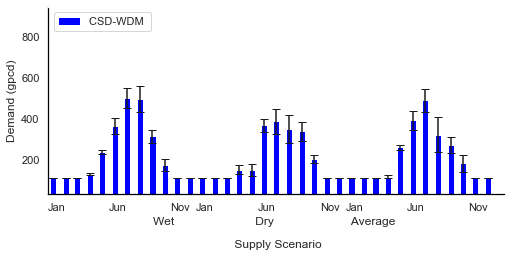

In [3]:
#Set indoor demand estimates
IndoorDemand = 110
units = 'gpcd'
Season = ['Apr', 'May', 'Jun', 'Jul','Aug', 'Sep','Oct']
population = 320000
prediction_name = 'Wet_Dry_Average_Climate'

CSDWDM.Prediction(CSDWDM.slc_test, IndoorDemand, units, Season, population, prediction_name, save_fig = True)

Making a total of  121  climate and supply scenarios based in user inputs
Scenario generation complete
Using the CSD-WDM to make predictions on generated climate and supply scenarios
Predictions complete, now calculating the seasonal demands based as a function of  Apr, May, Jun, Jul, Aug, Sep, Oct , and a population of  320000
Scenario generation and simulation complte, below are the resulting season demand estimates from CSD-WDM. To access this data, use CSDWDM.Demand_Matrix, with the climate scenarios as columns and supply scenarios as rows.
Saving results in prediction folder
Saving results in prediction folder


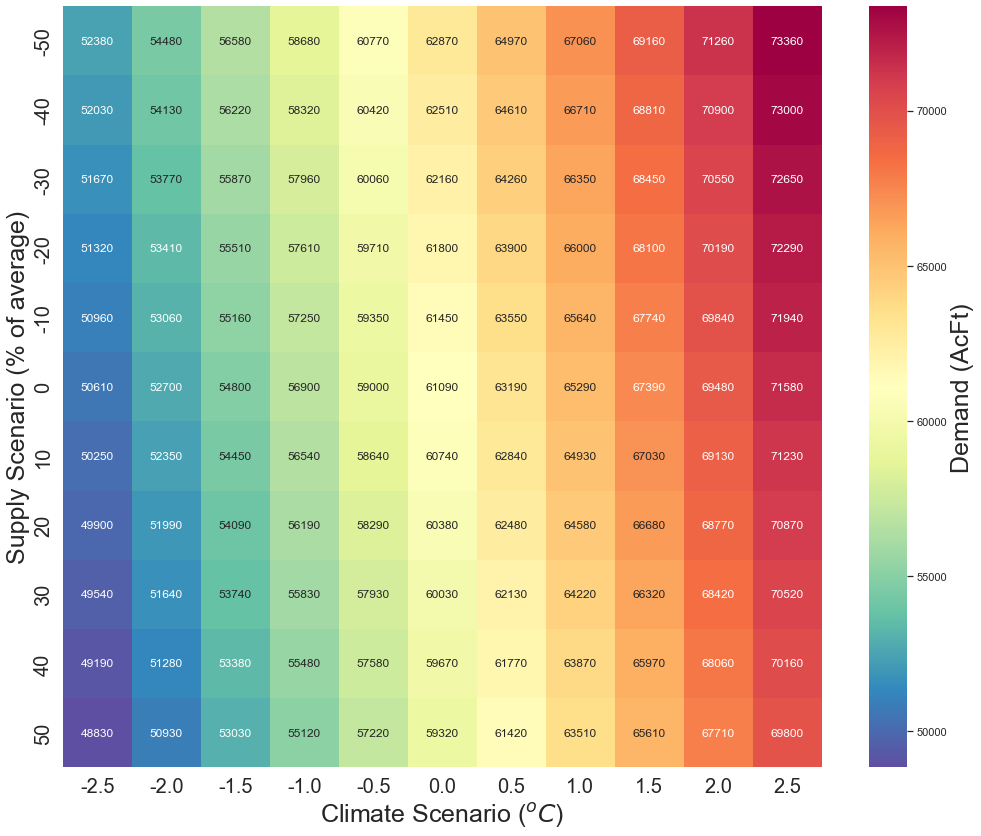

In [3]:
#Make climate and supply scenarios to run in the tuned CSDWDM

supply_beg =-50 
supply_end = 60
supply_step = 10
climate_beg = -2.5 
climate_end = 3 
climate_step = .5
IndoorDemand = 110
Season = ['Apr', 'May', 'Jun', 'Jul','Aug', 'Sep','Oct']
population = 320000
prediction_name = 'Ave_Sim_Trial'


CSDWDM.ScenarioGenerator(CSDWDM.slc_test, supply_beg, supply_end, supply_step, 
                         climate_beg, climate_end, climate_step, IndoorDemand, 
                         Season, population, prediction_name, save_results =True)



In [46]:
CSDWDM.Demand_Matrix

,-2.5,-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0,2.5
-50,52380.0,54480.0,56580.0,58680.0,60770.0,62870.0,64970.0,67060.0,69160.0,71260.0,73360.0
-40,52030.0,54130.0,56220.0,58320.0,60420.0,62510.0,64610.0,66710.0,68810.0,70900.0,73000.0
-30,51670.0,53770.0,55870.0,57960.0,60060.0,62160.0,64260.0,66350.0,68450.0,70550.0,72650.0
-20,51320.0,53410.0,55510.0,57610.0,59710.0,61800.0,63900.0,66000.0,68100.0,70190.0,72290.0
-10,50960.0,53060.0,55160.0,57250.0,59350.0,61450.0,63550.0,65640.0,67740.0,69840.0,71940.0
0,50610.0,52700.0,54800.0,56900.0,59000.0,61090.0,63190.0,65290.0,67390.0,69480.0,71580.0
10,50250.0,52350.0,54450.0,56540.0,58640.0,60740.0,62840.0,64930.0,67030.0,69130.0,71230.0
20,49900.0,51990.0,54090.0,56190.0,58290.0,60380.0,62480.0,64580.0,66680.0,68770.0,70870.0
30,49540.0,51640.0,53740.0,55830.0,57930.0,60030.0,62130.0,64220.0,66320.0,68420.0,70520.0
40,49190.0,51280.0,53380.0,55480.0,57580.0,59670.0,61770.0,63870.0,65970.0,68060.0,70160.0
